In [1]:
import numpy as np
import png
import pydicom
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from os import listdir
from os.path import isfile, join
import os
import torch
import torch.nn as nn
from torchvision.transforms import Compose
import transform_classes
import pandas as pd
import preprocess_img

In [2]:
from skimage.transform import resize

In [3]:
from roi import RoiLearn
from roi_dataset import RoiDataset
from autoencoder import Autoencoder
from preprocessor import Preprocessor
from PIL import Image
from autoencoder_dataset import AEDataset

In [186]:
# if we don't have the .csv file
preprocess_img.write_all_rectangle2file('O:\\ProgrammingSoftwares\\anaconda_projects\\heart_contour\\sa_all_2\\')

Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!
Dicom files were read in!
Con files were read in!


KeyError: '024'

## For modifying pre-path. --------------------------

In [7]:
csv_file = 'O:\\ProgrammingSoftwares\\anaconda_projects\\heart_contour\\sa_all_1\\rectangle.csv'
contour_data = pd.read_csv(csv_file,sep=';', names=('path','slice', 'frame', 'xmin', 'ymin', 'height','width' ))
contour_data['path'][0]

'/userhome/student/kede/heart_contour/heart_contour/sa_all_1/17108976AMR804/1001/imgs/1.3.46.670589.11.22133.5.0.4480.2017032208054948780.dcm'

In [9]:
contour_data = pd.read_csv(csv_file,sep=';', names=('path','slice', 'frame', 'xmin', 'ymin', 'height','width' ))
contour_data['path'] = (contour_data['path'].apply(lambda x: '/userhome/student/kede/heart_contour/heart_contour/sa_all_1/' + x.rsplit('\\', 4)[1] + '/'+ x.rsplit('\\', 4)[2] + '/'+x.rsplit('\\', 4)[3]+ '/'+x.rsplit('\\', 4)[4])[0])

IndexError: list index out of range

In [25]:
contour_data.to_csv(csv_file, sep=';', index=False, header=False)

# ----------------------------------------------------

In [199]:
csv_file = 'O:/ProgrammingSoftwares/anaconda_projects/heart_contour/sa_all_1/rectangle.csv'
csv_file2 = 'O:/ProgrammingSoftwares/anaconda_projects/heart_contour/sa_all_2/rectangle.csv'
save_ae_weights_test = 'O:\\ProgrammingSoftwares\\anaconda_projects\\heart_contour\\roi\\ae_test_w.pth'

compose3 = Compose([transform_classes.StandardScale2(),transform_classes.ToTensor()])

ds_train = AEDataset(csv_file, compose3, sample_size = 16)
ds_valid = AEDataset(csv_file2, compose3, sample_size = 16)

loader_train = torch.utils.data.DataLoader(ds_train,batch_size=16, num_workers=0)
loader_valid = torch.utils.data.DataLoader(ds_valid,batch_size=16, num_workers=0)

roi = RoiLearn()
roi.build_ae()

crit = torch.nn.MSELoss()
opt = torch.optim.Adam(roi.autoencoder.parameters(), weight_decay = 0.0001 )



roi.learn_ae(loader_train, optimizer = opt, criterion = crit,  ep = 50, dataset_validation = loader_valid, 
             weight_path = save_ae_weights_test)

#roi.ae_weights2model_feature_set()

epoch:  0  train_loss:  9.261743859980914  valid_loss:  13.05154125730962
epoch:  5  train_loss:  5.973209921644314  valid_loss:  9.017507034094551
epoch:  10  train_loss:  3.7341201914268294  valid_loss:  6.082507660950067
epoch:  15  train_loss:  2.407792365746205  valid_loss:  4.176320033883621
epoch:  20  train_loss:  1.7616652105759538  valid_loss:  3.079238843591333
epoch:  25  train_loss:  1.4952073765480063  valid_loss:  2.511060436928692
epoch:  30  train_loss:  1.3696278135047788  valid_loss:  2.2434397742018355
epoch:  35  train_loss:  1.280389284374159  valid_loss:  2.1420457686044334
epoch:  40  train_loss:  1.206273234245028  valid_loss:  2.12463902553634
epoch:  45  train_loss:  1.1417727721137176  valid_loss:  2.130626809022277


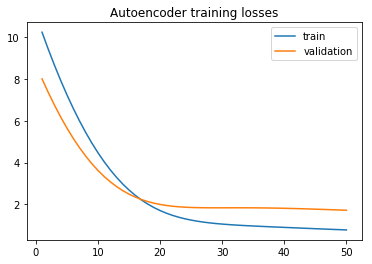

In [46]:
%matplotlib inline
roi.plot_ae_losses()

In [189]:
save_ae_weights_folder = 'O:\\ProgrammingSoftwares\\anaconda_projects\\heart_contour\\roi\\ae_w.pth'
roi.save_ae_weights(save_ae_weights_folder)

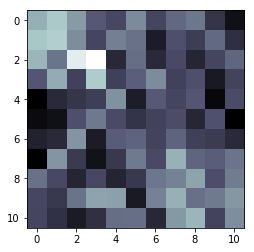

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt

idx = 2
_,decoded = roi.autoencoder(ds_valid.__getitem__(idx)['image'])
plt.imshow(np.reshape(decoded.cpu().detach().numpy(), (11,11)), cmap=plt.cm.bone) 

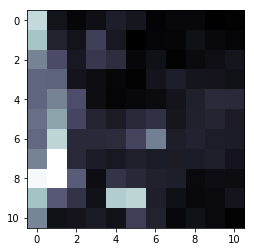

In [191]:
plt.imshow(np.reshape(roi.normalize_range(ds_valid.__getitem__(idx)['image'].cpu()).numpy(), (11,11)), cmap=plt.cm.bone) 

In [84]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision.transforms import Compose
import transform_classes
import torch as th

th.cuda.set_device(0)

csv_file = 'O:/ProgrammingSoftwares/anaconda_projects/heart_contour/sa_all_1/rectangle.csv'
csv_file2 = 'O:/ProgrammingSoftwares/anaconda_projects/heart_contour/sa_all_2/rectangle.csv'
csv_file3 = 'O:/ProgrammingSoftwares/anaconda_projects/heart_contour/sa_all_4/rectangle.csv'
save_model_weights_test = 'O:\\ProgrammingSoftwares\\anaconda_projects\\heart_contour\\roi\\model_test_w.pth'


compose1 = Compose([transform_classes.ReScale64(),transform_classes.StandardScale(),transform_classes.ToTensor()])
compose2 = Compose([transform_classes.ReScale32(),transform_classes.ToTensor()])

ds_train = RoiDataset(csv_file, compose1, compose2,smpl = 64)
ds_valid = RoiDataset(csv_file2, compose1, compose2,smpl = 8)
ds_test = RoiDataset(csv_file3, compose1, compose2,smpl = 8)

loader_train = torch.utils.data.DataLoader(ds_train,batch_size=32, shuffle=True,num_workers=0)
loader_valid = torch.utils.data.DataLoader(ds_valid,batch_size=8, shuffle=False,num_workers=0)
loader_test = torch.utils.data.DataLoader(ds_test, batch_size=8, shuffle=False,num_workers=0)

roi = RoiLearn()
roi.build_model()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(roi.model.parameters())#,weight_decay = 0.0001)
earlystop_info = {'step': 1e-6, 'patience_steps': 30}

ae_weights_folder = 'O:\\ProgrammingSoftwares\\anaconda_projects\\heart_contour\\roi\\ae_w.pth'
roi.load_ae_weights(ae_weights_folder)
roi.ae_weights2model_feature_set()
roi.model.conv1.weight.requires_grad=True
roi.model.conv1.bias.requires_grad=True

In [85]:
import warnings
warnings.filterwarnings('ignore')
torch.cuda.empty_cache()
roi.learn_roi(loader_train, optimizer, criterion, ep = 1000, dataset_validation = loader_valid, 
              weight_path = save_model_weights_test, dataset_test = loader_test, earlystop_info = earlystop_info)

Test results =>  test_loss:  34.66748852828741  test_dice_loss:  0.12427352690043351
test_center_average_loss:  35.42765426635742 

epoch:  0  train_loss:  47.40259620935004  valid_loss:  34.667175534372056
train_dice_loss:  0.031166640374158137  valid_dice_loss:  0.12427243639771537
train_center_loss:  44.30249786376953  valid_center_loss:  34.68982696533203 

epoch:  5  train_loss:  47.207980247842954  valid_loss:  34.51775149823024
train_dice_loss:  0.03104086237558685  valid_dice_loss:  0.12374855459766398
train_center_loss:  19.370647430419922  valid_center_loss:  19.167593002319336 

epoch:  10  train_loss:  46.86527889853731  valid_loss:  34.290346040430116
train_dice_loss:  0.030817748589681004  valid_dice_loss:  0.12294184356501346
train_center_loss:  15.60890007019043  valid_center_loss:  19.397409439086914 

epoch:  15  train_loss:  46.5638747166136  valid_loss:  34.10690386522848
train_dice_loss:  0.03061482025698857  valid_dice_loss:  0.12228110718378316
train_center_loss:

epoch:  170  train_loss:  45.923870372979266  valid_loss:  33.73000565496789
train_dice_loss:  0.030138921384637418  valid_dice_loss:  0.12063159605580233
train_center_loss:  15.063909530639648  valid_center_loss:  19.227619171142578 

epoch:  175  train_loss:  45.91989179990568  valid_loss:  33.72837968792993
train_dice_loss:  0.030135089403337124  valid_dice_loss:  0.12062681856515986
train_center_loss:  15.095580101013184  valid_center_loss:  19.227619171142578 

epoch:  180  train_loss:  45.91523519603926  valid_loss:  33.72929275130681
train_dice_loss:  0.030133407575172345  valid_dice_loss:  0.12063227320735542
train_center_loss:  15.172101974487305  valid_center_loss:  19.227619171142578 

epoch:  185  train_loss:  45.90976644414894  valid_loss:  33.73250632261879
train_dice_loss:  0.030127049095887905  valid_dice_loss:  0.12064694634344743
train_center_loss:  15.307327270507812  valid_center_loss:  19.227619171142578 

epoch:  190  train_loss:  45.9041438489564  valid_loss:  33

epoch:  340  train_loss:  45.83192864551461  valid_loss:  33.74514867333801
train_dice_loss:  0.030055902313600683  valid_dice_loss:  0.120626194493752
train_center_loss:  15.787152290344238  valid_center_loss:  19.642282485961914 

epoch:  345  train_loss:  45.83096197404816  valid_loss:  33.74616355712121
train_dice_loss:  0.030050345631642855  valid_dice_loss:  0.12062877391204836
train_center_loss:  15.677593231201172  valid_center_loss:  19.642282485961914 

epoch:  350  train_loss:  45.829843629462665  valid_loss:  33.745963629663805
train_dice_loss:  0.030042337584185126  valid_dice_loss:  0.1206271572994096
train_center_loss:  15.783933639526367  valid_center_loss:  19.642282485961914 

epoch:  355  train_loss:  45.82893121005078  valid_loss:  33.74603556958683
train_dice_loss:  0.03005183892491932  valid_dice_loss:  0.12062739750418394
train_center_loss:  15.745841979980469  valid_center_loss:  19.642282485961914 

epoch:  360  train_loss:  45.8279471781463  valid_loss:  33.74

KeyboardInterrupt: 

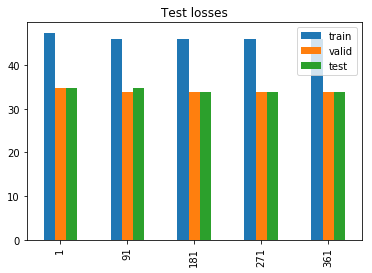

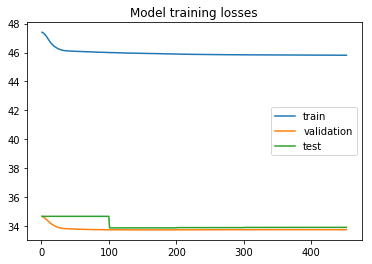

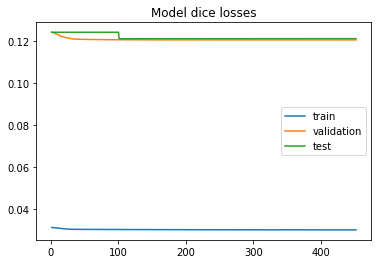

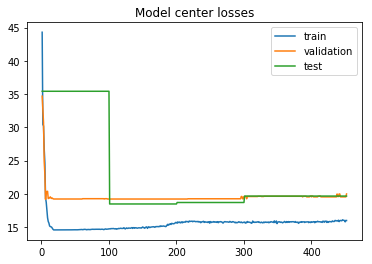

In [87]:
%matplotlib inline
roi.plot_model_test_losses( 450, 5)
roi.save_model_plots('roi_plot.png')
#roi.save_ae_plots('roi2_plot.png')

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision.transforms import Compose
import transform_classes
import torch as th
th.cuda.set_device(0)

csv_file = 'O:/ProgrammingSoftwares/anaconda_projects/heart_contour/sa_all_2/rectangle.csv'
compose1 = Compose([transform_classes.ReScale64(),transform_classes.StandardScale(),transform_classes.ToTensor()])
compose2 = Compose([transform_classes.ReScale32(),transform_classes.ToTensor()])
ds = RoiDataset(csv_file, compose1, compose2,smpl = 0)
roi = RoiLearn()
roi.load_model_weights('O:\\ProgrammingSoftwares\\anaconda_projects\\heart_contour\\roi\\model_w.pth')

In [18]:
roi.model.conv1.weight.requires_grad=True
roi.model.conv1.bias.requires_grad=True
roi.learn_roi(dataset_loader, optimizer, criterion, ep = 10)
print('Save weights')
save_model_weights_folder = 'O:\\ProgrammingSoftwares\\anaconda_projects\\heart_contour\\roi\\model_w.pth'
roi.save_model_weights(save_model_weights_folder)

epoch:  0  loss:  451.3814063319843
epoch:  1  loss:  451.3813822503478
epoch:  2  loss:  451.3813582795631
epoch:  3  loss:  451.38133441902306
epoch:  4  loss:  451.3813106681244
epoch:  5  loss:  451.38128702626716
epoch:  6  loss:  451.3812634928546
epoch:  7  loss:  451.3812400672935
epoch:  8  loss:  451.3812167489942
epoch:  9  loss:  451.38119353736994
Save weights


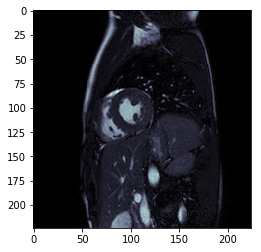

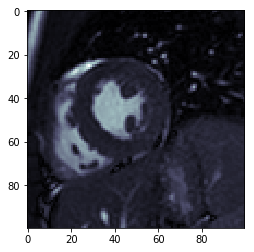

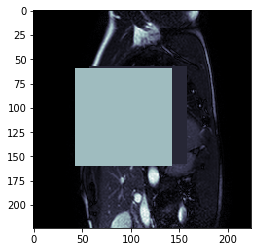

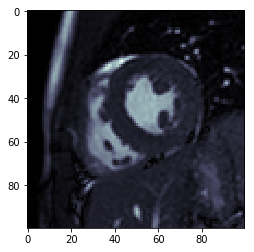

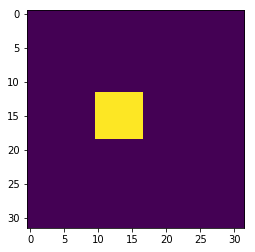

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from data_wrangling.con2img import draw_square

idx = 3
border_size=100
plt.figure()
cont = ds_valid.contour_data.iloc[idx]
image = ds_valid.dcm_images[str(cont['path'])]
plt.imshow(image,cmap=plt.cm.bone)

out = roi.model(torch.from_numpy(np.expand_dims(ds_valid.__getitem__(idx)['image'], axis = 0)).cuda())
reshaped_output = np.reshape(out.cpu().detach().numpy(), (32,32))
reshaped_output = resize(reshaped_output, (224,224))
max_index = np.unravel_index(np.argmax(reshaped_output), reshaped_output.shape)

plt.figure()
y_min = int(int(max_index[0]) - border_size/2)
y_max = int(int(max_index[0]) + border_size/2)
x_min = int(int(max_index[1]) - border_size/2)
x_max = int(int(max_index[1]) + border_size/2)
plt.imshow(image[x_min:x_max, y_min:y_max],cmap=plt.cm.bone)
plt.figure()
image_modify = image.copy()
center = ds_valid.__getitem__(idx)['mask_center']
image_modify[x_min:x_max, y_min:y_max] = 50
image_modify[center['y']-50:center['y']+50,center['x']-50: center['x']+50] = 200
plt.imshow(image_modify,cmap=plt.cm.bone)
plt.figure()
tt = ds_valid.contour_data[ds_valid.contour_data['path'] == str(cont['path'])]
image_modify2 = image.copy()
#image_modify2[int(tt['ymin']):int(tt['ymin']) +100, int(tt['xmin']): int(tt['xmin'])+100] = 50
plt.imshow(image_modify2[center['y']-50:center['y']+50,center['x']-50: center['x']+50],cmap=plt.cm.bone)
plt.figure()
plt.imshow(np.reshape(ds_valid.__getitem__(idx)['mask'], (32,32)))

[0.12231011]
(14, 15)


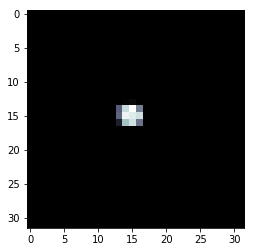

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
#roi.autoencoder()

idx = 6
out = roi.model(torch.from_numpy(np.expand_dims(ds.__getitem__(idx)['image'], axis = 0)).cuda())
#print(np.amax(out.detach().numpy() ))
reshaped_output = np.reshape(out.cpu().detach().numpy(), (32,32))
print(np.amax(out.cpu().detach().numpy(),axis=1))
max_index = np.unravel_index(np.argmax(reshaped_output), reshaped_output.shape)
plt.imshow(np.reshape(out.cpu().detach().numpy(), (32,32)), cmap=plt.cm.bone)

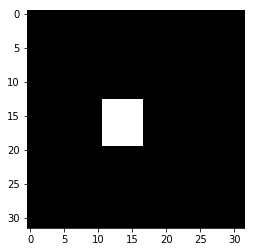

In [5]:
plt.imshow(np.reshape((ds.__getitem__(idx)['mask']).cpu().numpy(), (32,32)), cmap=plt.cm.bone)

In [10]:
torch.cuda.max_memory_allocated()

374413824